# **Connecting Drive**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# File path data in Drive
file_path = "/content/drive/My Drive/Pollutants_Merged18_05.csv"

# **Package Installation**

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# **Data Loading**

In [9]:
import pandas as pd
# Load the CSV
df = pd.read_csv(file_path)

In [10]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# **Data Cleaning**

In [11]:
# Variables with display names and units
variables_with_units = {
    'NO2_MEAN': 'NO₂ (mol/m²)',
    'SO2_MEAN': 'SO₂ (mol/m²)',
    'CO_MEAN': 'CO (mol/m²)',
    'O3_MEAN': 'O₃ (mol/m²)',
    'LST_MEAN': 'LST (°C)'
}
pollutants = ['NO2_MEAN', 'SO2_MEAN', 'CO_MEAN', 'O3_MEAN']

# Assign custom colors
colors = {
    'NO2_MEAN': 'crimson',
    'SO2_MEAN': 'green',
    'CO_MEAN': 'orange',
    'O3_MEAN': 'darkcyan',
    'LST_MEAN': 'purple'
}


# **Computation**

In [12]:

# Compute monthly stats
monthly_stats = df.groupby('Date')[list(variables_with_units.keys())].agg(['min', 'mean', 'max']).reset_index()


# **Visualization for Pollutants**

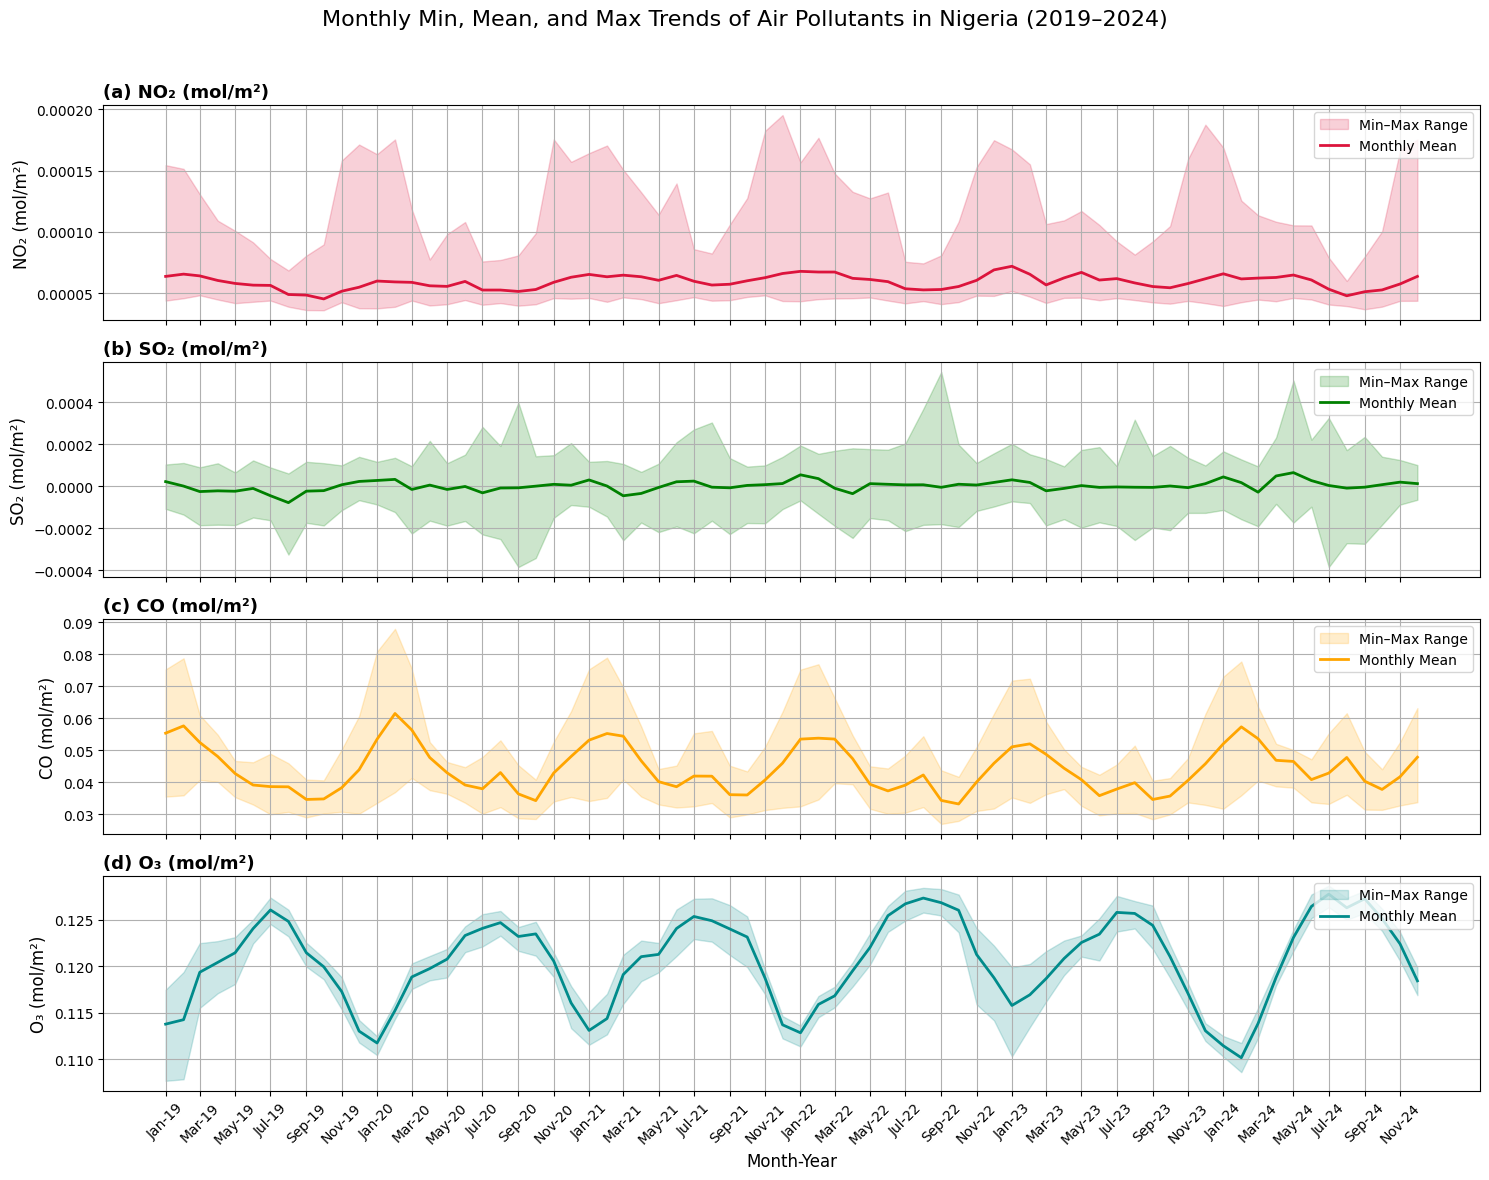

In [13]:

# Tick settings
tick_dates = pd.date_range(start='2019-01-01', end='2024-12-01', freq='2MS')
tick_labels = [date.strftime('%b-%y') for date in tick_dates]

fig, axes = plt.subplots(nrows=len(pollutants), ncols=1, figsize=(15, 12), sharex=True)

for i, var in enumerate(pollutants):
    ax = axes[i]
    min_vals = monthly_stats[(var, 'min')]
    mean_vals = monthly_stats[(var, 'mean')]
    max_vals = monthly_stats[(var, 'max')]
    dates = monthly_stats['Date']

# Shaded min-max
    ax.fill_between(dates, min_vals, max_vals, color=colors[var], alpha=0.2, label='Min–Max Range')
    ax.plot(dates, mean_vals, color=colors[var], linewidth=2, label='Monthly Mean')

    ax.set_ylabel(variables_with_units[var], fontsize=12)
    ax.set_title(f"({chr(97+i)}) {variables_with_units[var]}", fontsize=13, fontweight='bold', loc='left')
    ax.grid(True)
    ax.legend(loc='upper right', fontsize=10)
    ax.set_xticks(tick_dates)
    ax.set_xticklabels(tick_labels)

axes[-1].set_xlabel('Month-Year', fontsize=12)
plt.xticks(rotation=45)
fig.suptitle('Monthly Min, Mean, and Max Trends of Air Pollutants in Nigeria (2019–2024)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("monthly_air_pollutants_trends.png", dpi=300, bbox_inches='tight')
plt.show()


# **Visualization for LST**

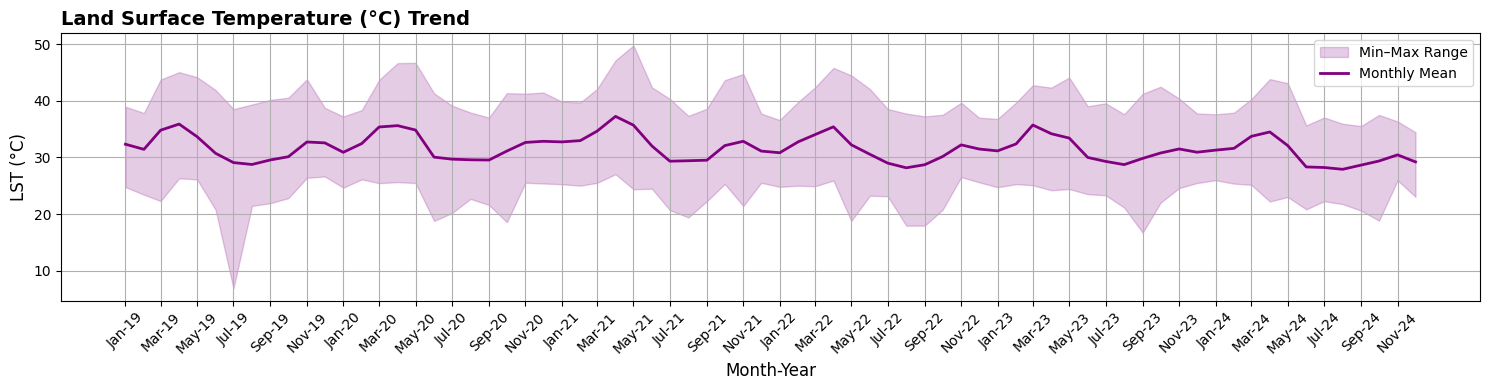

In [19]:
lst_var = 'LST_MEAN'
dates = monthly_stats['Date']
min_vals = monthly_stats[(lst_var, 'min')]
mean_vals = monthly_stats[(lst_var, 'mean')]
max_vals = monthly_stats[(lst_var, 'max')]

fig, ax = plt.subplots(figsize=(15, 4))
ax.fill_between(dates, min_vals, max_vals, color=colors[lst_var], alpha=0.2, label='Min–Max Range')
ax.plot(dates, mean_vals, color=colors[lst_var], linewidth=2, label='Monthly Mean')

ax.set_ylabel(variables_with_units[lst_var], fontsize=12)
ax.set_title("Land Surface Temperature (°C) Trend", fontsize=14, fontweight='bold', loc='left')
ax.grid(True)
ax.legend(loc='upper right', fontsize=10)
ax.set_xticks(tick_dates)
ax.set_xticklabels(tick_labels)
ax.set_xlabel('Month-Year', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("monthly_lst_trend.png", dpi=300, bbox_inches='tight')
plt.show()


# **Export Table**

In [20]:
# Flatten MultiIndex columns for better readability
monthly_stats.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in monthly_stats.columns]

# Print the table to the console
print(monthly_stats)

# Export Output
monthly_stats.to_csv('monthly_air_quality_stats.csv', index=False)

         Date  NO2_MEAN_min  NO2_MEAN_mean  NO2_MEAN_max  SO2_MEAN_min  \
0  2019-01-01      0.000044       0.000064      0.000154     -0.000107   
1  2019-02-01      0.000046       0.000065      0.000151     -0.000135   
2  2019-03-01      0.000048       0.000064      0.000131     -0.000186   
3  2019-04-01      0.000045       0.000060      0.000109     -0.000183   
4  2019-05-01      0.000042       0.000058      0.000101     -0.000185   
..        ...           ...            ...           ...           ...   
67 2024-08-01      0.000039       0.000048      0.000060     -0.000271   
68 2024-09-01      0.000037       0.000051      0.000080     -0.000274   
69 2024-10-01      0.000039       0.000053      0.000100     -0.000183   
70 2024-11-01      0.000044       0.000057      0.000166     -0.000087   
71 2024-12-01      0.000044       0.000064      0.000175     -0.000064   

    SO2_MEAN_mean  SO2_MEAN_max  CO_MEAN_min  CO_MEAN_mean  CO_MEAN_max  \
0        0.000022      0.000104     